## Hierarchical Clustering
### Advantages: The optimal number of clusters can be obtained by the model itself, practical visualisation with the dendrogram
### Disadvantages: Not appropriate for large datasets

In [1]:
# Load in the data
import os
import pandas as pd

DATASET_PATH = "datasets/"
DATASET_NAME = "Mall_Customers.csv"
DATASET_URL = DATASET_PATH + DATASET_NAME

def fetch_data(dataset_url=DATASET_URL, dataset_path=DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)

dataset = fetch_data()

def load_data(dataset_path=DATASET_PATH, dataset_name=DATASET_NAME):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)

dataset = load_data()

In [2]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Unsupervised (there is no y data)
X = dataset.iloc[:, [3, 4]].values

Use the Dendrogram to find the optimal number of clusters

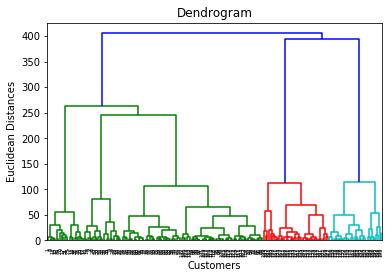

In [4]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

Based on this diagram, 5 is the ideal number of clusters

In [5]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

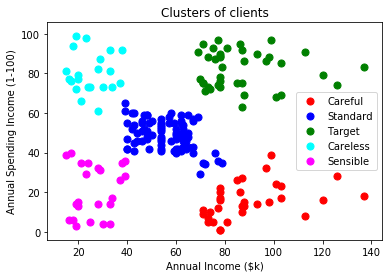

In [9]:
# Only for 2-D datasets **
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label="Careful")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue', label="Standard")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green', label="Target")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=50, c='cyan', label="Careless")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=50, c='magenta', label="Sensible")
plt.title('Clusters of clients')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Annual Spending Income (1-100)')
plt.legend()
plt.show()